In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from microjax.fastlens.mag_fft_jax import magnification_disk, magnification_limb1,magnification_limb2
from jax import jit, grad, vmap
import timeit
jax.config.update("jax_enable_x64", True)
import VBBinaryLensing
import seaborn as sns
sns.set_theme(font="serif",font_scale=1.3,style="ticks",)

In [2]:
VBBL = VBBinaryLensing.VBBinaryLensing()
VBBL.RelTol = 1e-6
mag_disk    = magnification_disk(rho_switch=1e-5)
mag_limb1   = magnification_limb1(rho_switch=1e-5, a1=0.8)
mag_disk    =  jit(vmap(mag_disk.A))
mag_limb    =  jit(vmap(mag_limb1.A))
VBBL.LoadESPLTable("/Users/shotamiyazaki/Analysis/work/VBBinaryLensing/VBBinaryLensing/data/ESPL.tbl")

I0000 00:00:1711440337.510097       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


In [3]:
N_sample = 10000
u   = jnp.array(np.random.uniform(0,1,N_sample))
rho = jnp.array(10**np.random.uniform(-5,1,N_sample))

%timeit -r 3 -n 1 mag = mag_disk(u,rho)
%timeit -r 3 -n 1 mag = mag_limb(u,rho)

514 ms ± 333 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
537 ms ± 360 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [4]:
%timeit -r 3 -n 1 mag_VB = [VBBL.ESPLMag(u_,rho_) for u_, rho_ in zip(u,rho)]
%timeit -r 3 -n 1 mag_VB = [VBBL.ESPLMagDark(u_,rho_) for u_, rho_ in zip(u,rho)]

278 ms ± 136 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
182 ms ± 955 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)


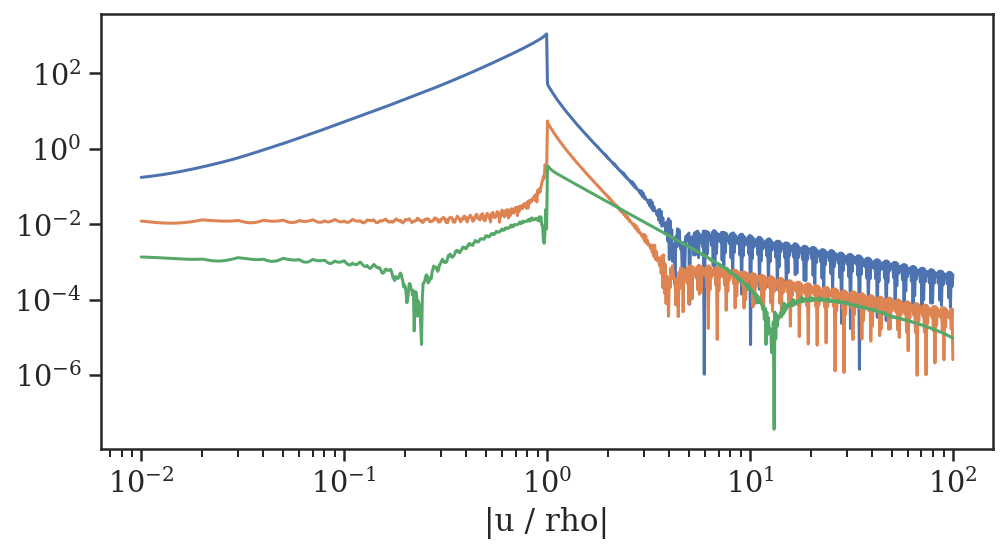

In [45]:
#plt.plot(u,mag_disk_(u,rho))
#plt.plot(u,mag_limb1_(u,rho))
#plt.plot(u,mag_limb2_(u,rho))

mag_disk    = magnification_disk(rho_switch=1e-5)
mag_limb1   = magnification_limb1(rho_switch=1e-5)
mag_limb2   = magnification_limb2(rho_switch=1e-5)
mag_disk_   =  jit(vmap(mag_disk.A))
mag_limb1_  =  jit(vmap(mag_limb1.A))
mag_limb2_  =  jit(vmap(mag_limb2.A))
u_rho = np.logspace(-2,2,1000)

plt.figure(figsize=(8,4))
rho = 1e-3 * np.ones(1000)
u = u_rho * rho
mag_VB = np.array([VBBL.ESPLMag(u_,r_) for u_, r_ in zip(u, rho)])
plt.plot(u_rho,np.abs(mag_VB - mag_disk_(u,rho).ravel()),"-")
rho = 0.01 * np.ones(1000)
u = u_rho * rho
mag_VB = np.array([VBBL.ESPLMag(u_,r_) for u_, r_ in zip(u, rho)])
plt.plot(u_rho,jnp.abs(mag_VB - mag_disk_(u,rho).ravel()),"-")
rho = 0.1 * np.ones(1000)
u = u_rho * rho
mag_VB = np.array([VBBL.ESPLMag(u_,r_) for u_, r_ in zip(u, rho)])
plt.plot(u_rho,np.abs(mag_VB - mag_disk_(u,rho).ravel()),"-")
plt.xlabel("|u / rho|")
plt.loglog()
plt.show()